In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

In [3]:
trans_extended = pd.merge(transactions, customers, on='CustomerID', how='left')
trans_extended = pd.merge(trans_extended, products, on='ProductID', how='left')

In [4]:
customer_features = trans_extended.pivot_table(index='CustomerID', columns='ProductID', values='TotalValue', aggfunc='sum', fill_value=0)
customer_features = customer_features.reindex(customers['CustomerID']).fillna(0)
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(customer_features_scaled)
customers['Cluster'] = clusters  

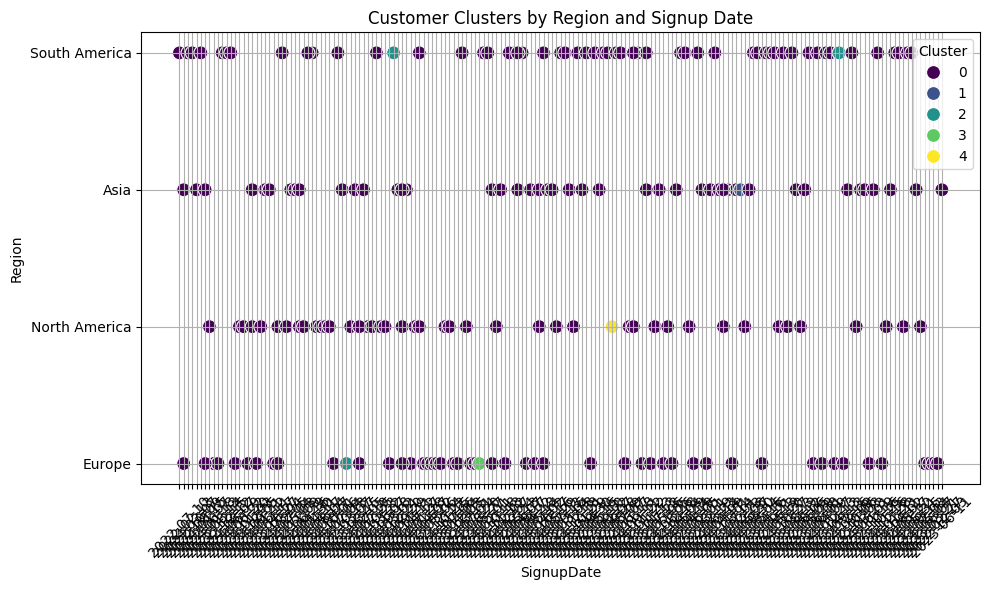

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customers['SignupDate'], y=customers['Region'], hue=customers['Cluster'], palette='viridis', s=100)
plt.title('Customer Clusters by Region and Signup Date')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
db_index = davies_bouldin_score(customer_features_scaled, clusters)

print("Davies-Bouldin Index:", db_index)


Davies-Bouldin Index: 1.1646342875187083
